# Advanced Lane Line Finding Project Workbook

## Libraries and Includes

In [33]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

## Camera Calibration

In [46]:
# Update the number of x points to 9 as indicated in the lesson
nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
numberOfUndetected = 0
# Step through the list and search for chessboard corners
for fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), flags=(cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK))

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal/corners_found_'+ fname.split('\\')[-1]
        #print(write_name)
        cv2.imwrite(write_name, img)
    else:
        numberOfUndetected = numberOfUndetected + 1

print(numberOfUndetected)

3


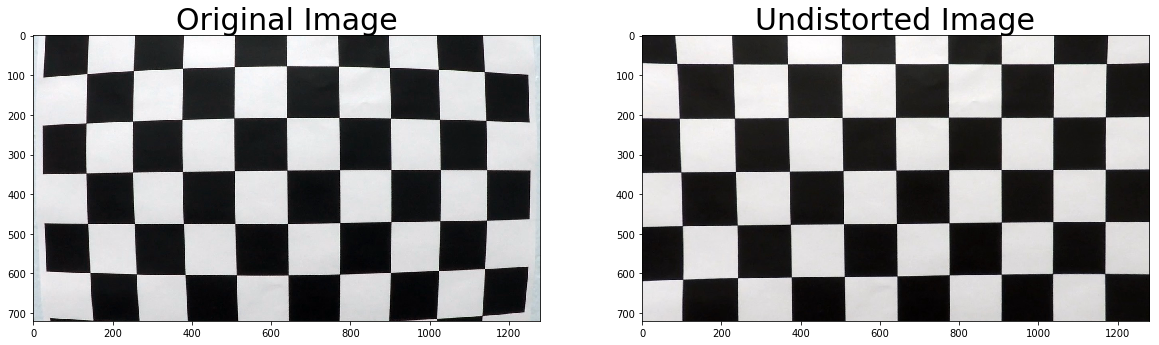

In [47]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/dist_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Apply Distortion Correction to Test Images

In [51]:
# Load pickled data
calibration_data = "camera_cal/dist_pickle.p"

with open(calibration_data, mode='rb') as f:
    dist_pickle = pickle.load(f)
    
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [52]:
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

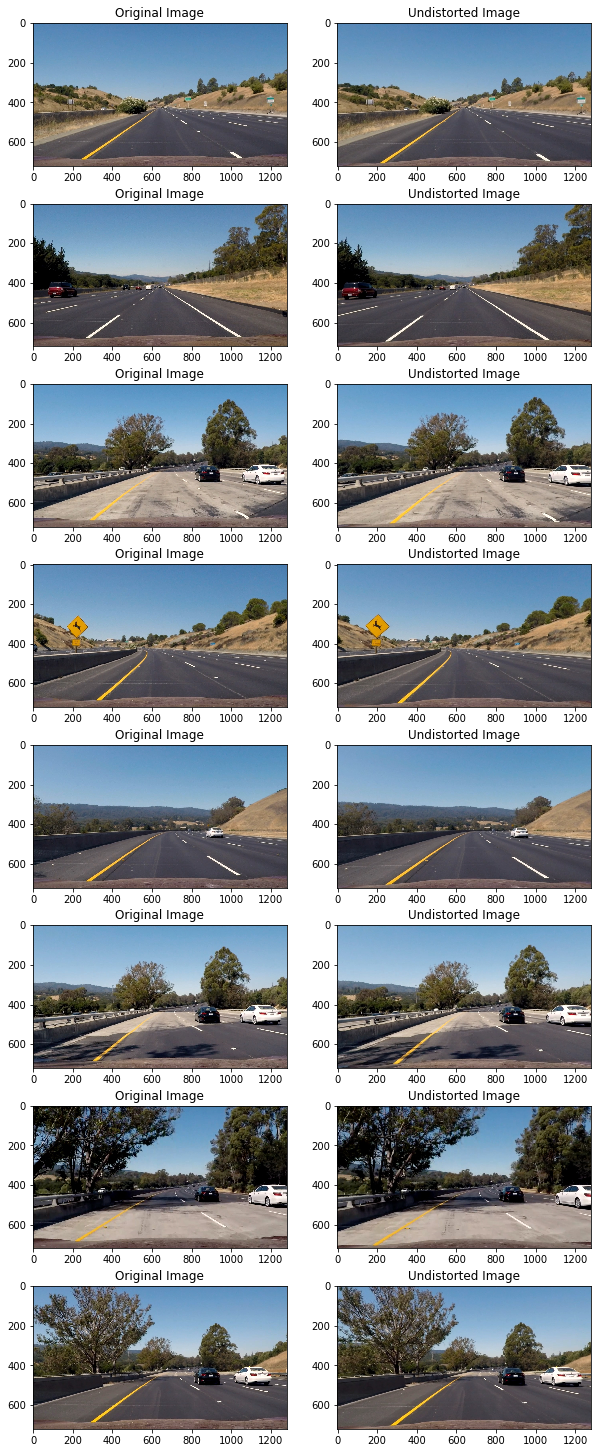

In [72]:
images_name = glob.glob('test_images/*')

plt.figure(figsize=(10, 26))

images = []
for idx, fname in enumerate(images_name):
    img = cv2.imread(fname)
    plt.subplot(len(images_name), 2, idx*2+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    
    img = undistort(img)
    plt.subplot(len(images_name), 2, idx*2+2)
    images.append(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Undistorted Image")